<a href="https://colab.research.google.com/github/mpanahish/RecycleIT-A/blob/main/1401_06_15_first_model_performance_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
# from torch import models

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/RecycleIT/MODEL/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=path)#, force_reload=True ,autoshape=True) 

# model = torch.hub.load('ultralytics/yolov5', 'custom', path='path/to/best.pt')  # default
# model = torch.hub.load('path/to/yolov5', 'custom', path='path/to/best.pt', source='local')  # local repo

type(model)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-8 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7254609 parameters, 0 gradients
Adding AutoShape... 


models.common.AutoShape

In [ ]:
# تست مدل
path = '/content/drive/MyDrive/RecycleIT/Wadaba dataset/Set 14/0066_a01b00c1d0e0f0g0h0.jpg'
result = model([path])
print (result)

image 1/1: 1277x1920 1 3
Speed: 78.1ms pre-process, 323.8ms inference, 0.8ms NMS per image at shape (1, 3, 448, 640)



In [ ]:
type(result)

models.common.Detections

In [16]:
import sys, os
def get_image ():
  c = 0
  # root = "/content/drive/MyDrive/RecycleIT/Wadaba dataset/Set 10"
  # root = "/content/drive/MyDrive/RecycleIT/Wadaba dataset"
  # root = '/content/drive/MyDrive/RecycleIT/DATA/dataset'
  root = '/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs'
  for path, subdirs, files in os.walk(root):
    files = [ fi for fi in files if  fi.endswith(".jpg") ]
    print('تعداد فایل ها:' + str(len(files)))
    for name in files:
        print(c)
        c =c+1
        # print(os.path.join(path, name))
        yield(os.path.join(path, name))

In [5]:
! pip install line_profiler
! pip install memory_profiler
# import memory_profiler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 5.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=5139d5544c8c7f8cc9cb9de5f5256b4c306b40378921279f68ce091fcf1bd3a2
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [6]:
%load_ext line_profiler
# %load_ext memory_profiler 

In [7]:
# Batch Infrence
def func():
  # counter = 0
  list_path = []
  for path in get_image():
    # counter = counter +1
    if (len(list_path) <10) : list_path.append(path)
    else :  
       model(list_path)
       list_path = []

In [1]:
#  Infrence
def func():
  for path in get_image():
       print(path)
       model(path)

In [22]:
model(['/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/Glass511.jpg'])

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 34853 had too many entries: 13, expected 1
  % (tag, len(values))


TypeError: ignored

In [21]:
# %prun func()
a = %lprun -f func func()

Streaming output truncated to the last 5000 lines.
944
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET474.jpg
945
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET412.jpg
946
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET489.jpg
947
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET309.jpg
948
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET407.jpg
949
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET413.jpg
950
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET396.jpg
951
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET424.jpg
952
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET406.jpg
953
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET503.jpg
954
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET394.jpg
955
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET405.jpg
956
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET383.jpg
957
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET299.jpg
958
/content/drive/MyDrive/RecycleIT/DATA/YOLO_imgs/PET316.jpg
959


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 34853 had too many entries: 13, expected 1
  % (tag, len(values))


TypeError: ignored

In [10]:
print(a)

None


In [ ]:
%mprun -f func func()

UsageError: Line magic function `%mprun` not found.


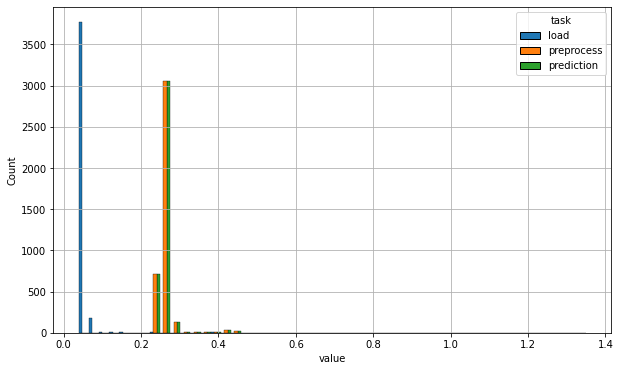

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots( figsize = (10,6))

sns.histplot(x = 'value',
            data = performance_report ,
             color = '#760128',
             bins=50,
             alpha=1,
             hue = 'task',
            #  palette = color[9:],
            #  hue_order=order,
             multiple='dodge' #multiple{“layer”, “dodge”, “stack”, “fill”}
              )
             

# ax.set_ylabel(make_farsi_text(" تعداد افراد که دارای هزینه سالیانه غیر معمول هستند "),fontsize=14)
# ax.set_xlabel(make_farsi_text(" تعداد روزهایی که هزینه غیر معمول داشته اند  "),fontsize=14)

# plt.xticks(bins)

ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.show()